In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
username = 'postgres'
password = '.'
host = '127.0.0.1'
port = '5432'
database = 'sql_challenge'

db_url = 'postgresql://{}:{}@{}:{}/{}'.format(
    username, password, host, port, database)

engine = create_engine(db_url)

conn = engine.connect()


In [3]:
employees_data = pd.read_sql("SELECT * FROM employees", conn)

In [4]:
salaries_data = pd.read_sql("SELECT * FROM salaries", conn)

In [5]:
combined_data = pd.merge(employees_data, salaries_data, on="emp_no", how="inner")
combined_data.rename(columns={"emp_title_id": "title_id"}, inplace=True)
combined_data

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988,69696
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995,75355
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988,61886
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994,62772


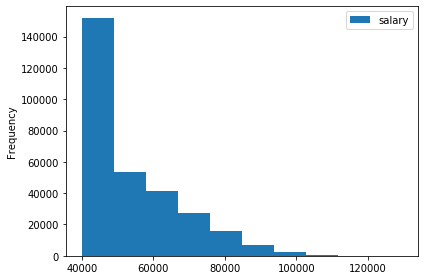

In [6]:
#  Create a histogram to visualize the most common salary ranges for employees.
df = pd.DataFrame(combined_data, columns=['salary'])
df ['salary']= pd.to_numeric(df['salary'])
df.plot.hist()
plt.tight_layout()
plt.show()

In [10]:
title_data = pd.read_sql("SELECT * FROM titles", conn)
salary_title = pd.merge(combined_data, title_data, on="title_id", how="left")
salary_title.head(20)


,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422,Engineer
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973,Engineer
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000,Senior Engineer
5,263976,e0003,10/30/1959,Eran,Cusworth,M,11/14/1986,40000,Senior Engineer
6,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
7,461591,s0002,11/17/1964,Xudong,Samarati,M,11/13/1985,40000,Senior Staff
8,477657,e0002,12/18/1962,Lihong,Magliocco,M,10/23/1993,54816,Engineer
9,219881,s0002,4/24/1956,Kwangyoen,Speek,F,2/14/1993,40000,Senior Staff


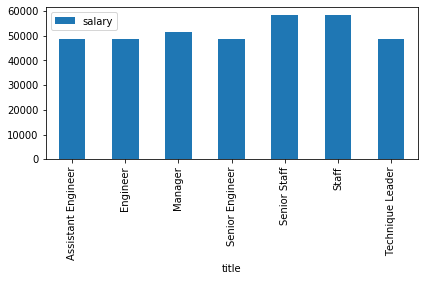

In [8]:
# 3. Create a bar chart of average salary by title.
df_avg = pd.DataFrame(salary_title, columns=['title','salary'])
df_avg ['salary']= pd.to_numeric(df_avg['salary'])
df_avg = df_avg.groupby(['title']).mean()
df_avg.plot.bar()
plt.tight_layout()
plt.show()
